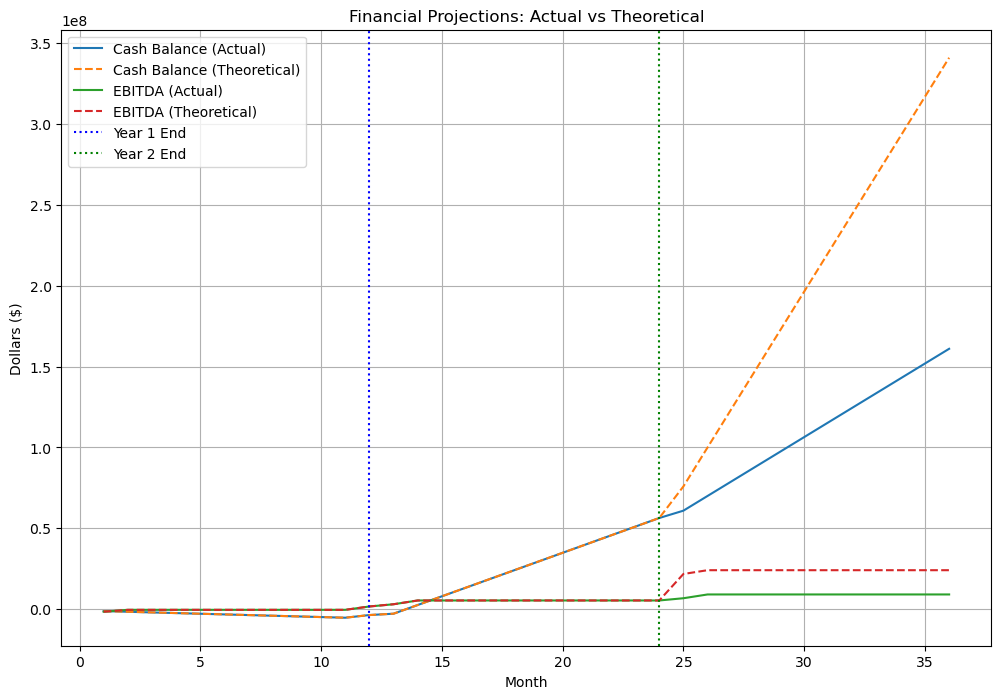

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Financial Model Variables
initial_cash = 1500000  # Initial cash reserve
monthly_growth_rate = 0.1  # Patient growth rate per month
patients_per_home = 150  # Patients per nursing home
homes_per_state = 40  # Nursing homes per state
states = ["Virginia", "Florida", "Texas", "New York", "California"]

# Billing Code Revenue (Actual)
billing_code_revenue = {
    "RPM": 45,
    "CCM": 60,
    "TCM": 230
}  # Per patient, monthly

# Billing Code Revenue (Theoretical - Year 3+)
theoretical_billing_code_revenue = {
    **billing_code_revenue,  # Existing codes
    "Alzheimer’s": 180,
    "Mental Health": 120,
    "Preventive Care": 200
}

service_fee = 10  # Monthly platform fee per patient

# Cost Assumptions
hardware_cost_per_patient = 185  # One-time
monthly_software_cost_per_patient = 35
staff_cost_per_state = 700000  # Annual
other_fixed_costs = 200000  # Monthly

# Time Periods
months = 36
deployment_timeline = {
    1: ["Virginia"],
    13: ["Florida", "Texas"],
    25: ["New York", "California"]
}

# Data Storage
data = {
    "Month": [],
    "Year": [],
    "Total Revenue (Actual)": [],
    "Total Revenue (Theoretical)": [],
    "Total Costs": [],
    "EBITDA (Actual)": [],
    "EBITDA (Theoretical)": [],
    "Cash Balance (Actual)": [],
    "Cash Balance (Theoretical)": []
}

# Initialize variables
cash_balance_actual = initial_cash
cash_balance_theoretical = initial_cash
patients = 0
cumulative_patients = 0
year = 1

# Model Calculation
for month in range(1, months + 1):
    if month % 12 == 1 and month > 1:
        year += 1

    # Add states based on deployment timeline
    if month in deployment_timeline:
        states_added = deployment_timeline[month]
        patients += patients_per_home * homes_per_state * len(states_added)

    # Calculate Revenue (Actual)
    if month >= 12:  # Revenue starts after hardware deployment
        actual_revenue = (
            patients * (sum(billing_code_revenue.values()) + service_fee)
        )
    else:
        actual_revenue = 0

    # Calculate Revenue (Theoretical) - Year 3+
    if month >= 25:  # Theoretical billing codes start in Year 3
        theoretical_revenue = (
            patients * (sum(theoretical_billing_code_revenue.values()) + service_fee)
        )
    else:
        theoretical_revenue = actual_revenue

    # Costs
    hardware_costs = (
        patients_per_home * homes_per_state * len(deployment_timeline.get(month, [])) * hardware_cost_per_patient
    )
    software_costs = patients * monthly_software_cost_per_patient
    staffing_costs = len(deployment_timeline.get(month, [])) * staff_cost_per_state / 12
    total_costs = hardware_costs + software_costs + staffing_costs + other_fixed_costs

    # EBITDA
    ebitda_actual = actual_revenue - total_costs
    ebitda_theoretical = theoretical_revenue - total_costs

    # Free Cash Flow
    cash_balance_actual += ebitda_actual - hardware_costs
    cash_balance_theoretical += ebitda_theoretical - hardware_costs

    # Store Data
    data["Month"].append(month)
    data["Year"].append(year)
    data["Total Revenue (Actual)"].append(actual_revenue)
    data["Total Revenue (Theoretical)"].append(theoretical_revenue)
    data["Total Costs"].append(total_costs)
    data["EBITDA (Actual)"].append(ebitda_actual)
    data["EBITDA (Theoretical)"].append(ebitda_theoretical)
    data["Cash Balance (Actual)"].append(cash_balance_actual)
    data["Cash Balance (Theoretical)"].append(cash_balance_theoretical)

# Convert to DataFrame
financials = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(12, 8))

# Cash Balance and EBITDA Lines
plt.plot(financials["Month"], financials["Cash Balance (Actual)"], label="Cash Balance (Actual)", linestyle="-")
plt.plot(financials["Month"], financials["Cash Balance (Theoretical)"], label="Cash Balance (Theoretical)", linestyle="--")
plt.plot(financials["Month"], financials["EBITDA (Actual)"], label="EBITDA (Actual)", linestyle="-")
plt.plot(financials["Month"], financials["EBITDA (Theoretical)"], label="EBITDA (Theoretical)", linestyle="--")

# Annotations for Year Markers
plt.axvline(x=12, color="blue", linestyle=":", label="Year 1 End")
plt.axvline(x=24, color="green", linestyle=":", label="Year 2 End")

plt.xlabel("Month")
plt.ylabel("Dollars ($)")
plt.title("Financial Projections: Actual vs Theoretical")
plt.legend()
plt.grid(True)
plt.show()

# Display Data
financials_formatted = financials.style.format("{:,.0f}", subset=financials.columns[2:])


In [6]:
financials_formatted

,Month,Year,Total Revenue (Actual),Total Revenue (Theoretical),Total Costs,EBITDA (Actual),EBITDA (Theoretical),Cash Balance (Actual),Cash Balance (Theoretical)
0,1,1,0,0,"1,578,333","-1,578,333","-1,578,333","-1,188,333","-1,188,333"
1,2,1,0,0,"410,000","-410,000","-410,000","-1,598,333","-1,598,333"
2,3,1,0,0,"410,000","-410,000","-410,000","-2,008,333","-2,008,333"
3,4,1,0,0,"410,000","-410,000","-410,000","-2,418,333","-2,418,333"
4,5,1,0,0,"410,000","-410,000","-410,000","-2,828,333","-2,828,333"
5,6,1,0,0,"410,000","-410,000","-410,000","-3,238,333","-3,238,333"
6,7,1,0,0,"410,000","-410,000","-410,000","-3,648,333","-3,648,333"
7,8,1,0,0,"410,000","-410,000","-410,000","-4,058,333","-4,058,333"
8,9,1,0,0,"410,000","-410,000","-410,000","-4,468,333","-4,468,333"
9,10,1,0,0,"410,000","-410,000","-410,000","-4,878,333","-4,878,333"


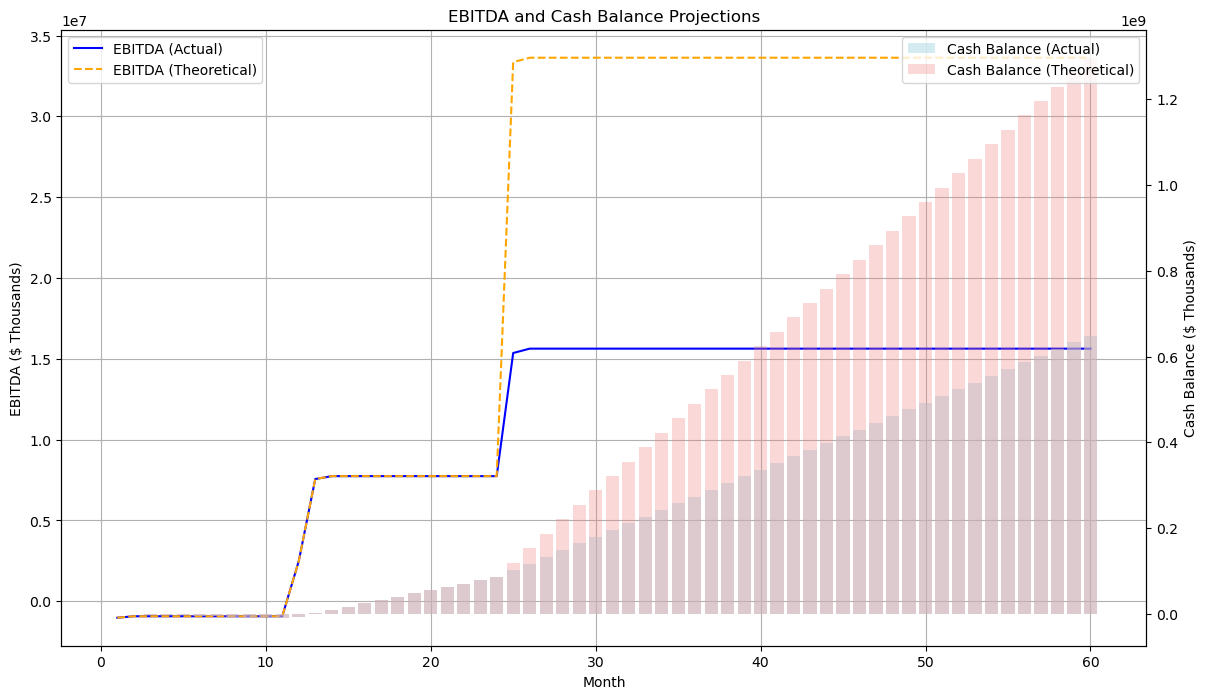

,Month,Year,Total Revenue (Actual),Total Revenue (Theoretical),Total Costs,EBITDA (Actual),EBITDA (Theoretical),Cash Balance (Actual),Cash Balance (Theoretical)
0,1,1,0,0,"1,020,000","-1,020,000","-1,020,000","480,000","480,000"
1,2,1,0,0,"930,000","-930,000","-930,000","-450,000","-450,000"
2,3,1,0,0,"930,000","-930,000","-930,000","-1,380,000","-1,380,000"
3,4,1,0,0,"930,000","-930,000","-930,000","-2,310,000","-2,310,000"
4,5,1,0,0,"930,000","-930,000","-930,000","-3,240,000","-3,240,000"
5,6,1,0,0,"930,000","-930,000","-930,000","-4,170,000","-4,170,000"
6,7,1,0,0,"930,000","-930,000","-930,000","-5,100,000","-5,100,000"
7,8,1,0,0,"930,000","-930,000","-930,000","-6,030,000","-6,030,000"
8,9,1,0,0,"930,000","-930,000","-930,000","-6,960,000","-6,960,000"
9,10,1,0,0,"930,000","-930,000","-930,000","-7,890,000","-7,890,000"


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Model Parameters
states = ["Virginia", "Florida", "Texas", "New York", "New Jersey", "California"]
nursing_homes_per_state = 40
patients_per_home = 150
monthly_growth_rate = 0.05
initial_cash = 1_500_000  # Starting cash

# Cost Assumptions
staffing_cost_per_patient = 100
platform_fee_per_patient = 30
device_amortization_per_patient = 15
operational_cost_per_home = 2_000
c_suite_salaries = 50_000  # Monthly
admin_costs = 20_000  # Monthly

# Revenue Assumptions
gpci_adjustments = {
    "Virginia": 1.0,
    "Florida": 1.05,
    "Texas": 1.03,
    "New York": 1.08,
    "New Jersey": 1.06,
    "California": 1.1
}

billing_codes = {
    "99453": 18.95,  # RPM Setup
    "99454": 45.12,  # RPM Device Supply
    "99457": 46.85,  # RPM Management (1st 20 mins)
    "99458": 37.62,  # Additional RPM Management
    "99490": 59.90,  # CCM by Clinical Staff
    "99491": 80.98,  # CCM by Physician
    "99487": 128.44,  # Complex CCM (1st 60 mins)
    "99489": 69.13,  # Additional Complex CCM
    "99091": 51.29   # Data Interpretation (30 days)
}

# Theoretical Billing Codes (Year 3+)
theoretical_codes = {
    **billing_codes,
    "Alzheimer’s": 180,
    "Mental Health": 120,
    "Preventive Care": 200
}

deployment_timeline = {
    1: ["Virginia"],
    13: ["Florida", "Texas"],
    25: ["New York", "New Jersey", "California"]
}

# Data Storage
data = {
    "Month": [],
    "Year": [],
    "Total Revenue (Actual)": [],
    "Total Revenue (Theoretical)": [],
    "Total Costs": [],
    "EBITDA (Actual)": [],
    "EBITDA (Theoretical)": [],
    "Cash Balance (Actual)": [],
    "Cash Balance (Theoretical)": []
}

# Initialize variables
cash_actual = initial_cash
cash_theoretical = initial_cash
patients = 0
year = 1

# Model Calculation
for month in range(1, 61):  # 5 years
    if month % 12 == 1 and month > 1:
        year += 1

    # Add states based on timeline
    if month in deployment_timeline:
        states_added = deployment_timeline[month]
        patients += nursing_homes_per_state * patients_per_home * len(states_added)

    # Revenue Calculations
    if month >= 12:  # Revenue starts in Year 2
        revenue_per_patient_actual = sum([rate * gpci_adjustments["Virginia"] for rate in billing_codes.values()])
        revenue_actual = patients * (revenue_per_patient_actual + platform_fee_per_patient)
    else:
        revenue_actual = 0

    if month >= 25:  # Theoretical revenue starts Year 3
        revenue_per_patient_theoretical = sum([rate * gpci_adjustments["Virginia"] for rate in theoretical_codes.values()])
        revenue_theoretical = patients * (revenue_per_patient_theoretical + platform_fee_per_patient)
    else:
        revenue_theoretical = revenue_actual

    # Costs
    hardware_costs = (
        nursing_homes_per_state * patients_per_home * len(deployment_timeline.get(month, [])) * device_amortization_per_patient
    )
    monthly_costs = patients * (staffing_cost_per_patient + platform_fee_per_patient) + operational_cost_per_home * nursing_homes_per_state + c_suite_salaries + admin_costs
    total_costs = monthly_costs + hardware_costs

    # EBITDA
    ebitda_actual = revenue_actual - total_costs
    ebitda_theoretical = revenue_theoretical - total_costs

    # Cash Balance
    cash_actual += ebitda_actual
    cash_theoretical += ebitda_theoretical

    # Store Data
    data["Month"].append(month)
    data["Year"].append(year)
    data["Total Revenue (Actual)"].append(revenue_actual)
    data["Total Revenue (Theoretical)"].append(revenue_theoretical)
    data["Total Costs"].append(total_costs)
    data["EBITDA (Actual)"].append(ebitda_actual)
    data["EBITDA (Theoretical)"].append(ebitda_theoretical)
    data["Cash Balance (Actual)"].append(cash_actual)
    data["Cash Balance (Theoretical)"].append(cash_theoretical)

# Convert to DataFrame
financials = pd.DataFrame(data)

# Visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

# Line Graph for EBITDA
ax1.plot(financials["Month"], financials["EBITDA (Actual)"], label="EBITDA (Actual)", linestyle="-", color="blue")
ax1.plot(financials["Month"], financials["EBITDA (Theoretical)"], label="EBITDA (Theoretical)", linestyle="--", color="orange")
ax1.set_ylabel("EBITDA ($ Thousands)")
ax1.set_xlabel("Month")
ax1.tick_params(axis="y")
ax1.legend(loc="upper left")
ax1.set_title("EBITDA and Cash Balance Projections")

# Bar Graph for Cash Balance
ax2 = ax1.twinx()
ax2.bar(financials["Month"], financials["Cash Balance (Actual)"], label="Cash Balance (Actual)", alpha=0.5, color="lightblue")
ax2.bar(financials["Month"], financials["Cash Balance (Theoretical)"], label="Cash Balance (Theoretical)", alpha=0.3, color="lightcoral")
ax2.set_ylabel("Cash Balance ($ Thousands)")
ax2.legend(loc="upper right")

# Add grid and display
ax1.grid()
# Save the graph as a PNG file
plt.savefig("financial_projections.png", dpi=300)
plt.show()

# Display financials
financials_formatted = financials.style.format("{:,.0f}", subset=financials.columns[2:])
financials_formatted


In [17]:
# Assuming 'financials' is the DataFrame with the data
file_name = "financials_output.csv"
financials.to_csv(file_name, index=False)

print(f"Financials exported successfully to {file_name}")

Financials exported successfully to financials_output.csv


In [18]:
# Save the graph as a PNG file
plt.savefig("financial_projections.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [19]:
!pwd

/Users/samuelsalfati/Documents/Education_Data_Science/Telehealth


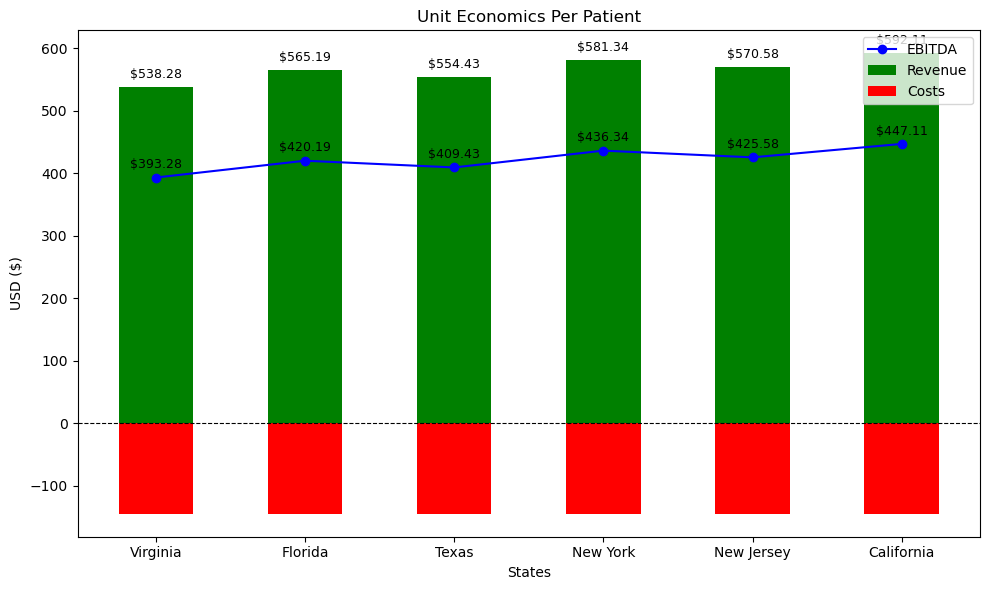

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data
states = ['Virginia', 'Florida', 'Texas', 'New York', 'New Jersey', 'California']
gpci_adjustments = [1.00, 1.05, 1.03, 1.08, 1.06, 1.10]
base_revenue = 538.28
costs_per_patient = 100 + 30 + 15  # Staffing + Platform + Device Amortization

# Calculate revenue and EBITDA
revenue_per_patient = [base_revenue * gpci for gpci in gpci_adjustments]
ebitda_per_patient = [rev - costs_per_patient for rev in revenue_per_patient]

# Plotting
x = np.arange(len(states))
width = 0.5

fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars for revenue and costs
revenue_bars = ax.bar(x, revenue_per_patient, width, label='Revenue', color='green')
cost_bars = ax.bar(x, -costs_per_patient, width, label='Costs', color='red')

# Line for EBITDA
ax.plot(x, ebitda_per_patient, label='EBITDA', color='blue', marker='o')

# Labels and formatting
ax.set_xlabel('States')
ax.set_ylabel('USD ($)')
ax.set_title('Unit Economics Per Patient')
ax.set_xticks(x)
ax.set_xticklabels(states)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.legend()

# Annotations
for i, val in enumerate(revenue_per_patient):
    ax.text(i, val + 10, f"${val:.2f}", ha='center', va='bottom', fontsize=9)
for i, val in enumerate(ebitda_per_patient):
    ax.text(i, val + 10, f"${val:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('unit_economics_graph.pdf')
plt.show()


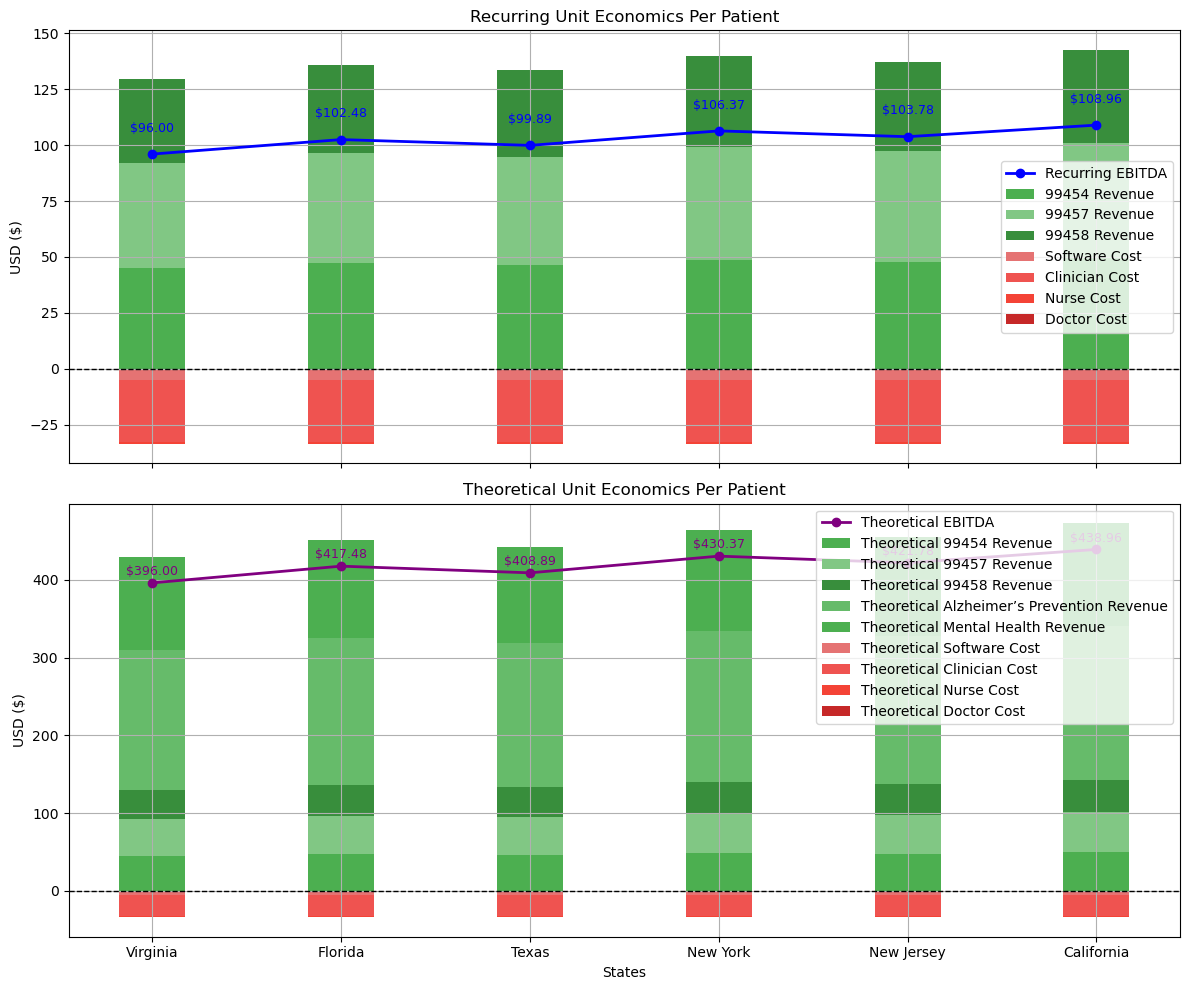

ModuleNotFoundError: No module named 'ace_tools'

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modern color palette
colors = {
    "revenue": ["#4CAF50", "#81C784", "#388E3C", "#66BB6A"],  # Shades of green
    "costs": ["#E57373", "#EF5350", "#F44336", "#C62828"],    # Shades of red
    "ebitda": "#2196F3",  # Blue for EBITDA
    "line": "#FF9800"     # Orange for Theoretical
}

# GPCI Adjustments
gpci_adjustments = {
    "Virginia": 1.0,
    "Florida": 1.05,
    "Texas": 1.03,
    "New York": 1.08,
    "New Jersey": 1.06,
    "California": 1.1
}

# Revenue Breakdown (Recurring and Theoretical)
recurring_revenue_per_patient = {
    "99454": 45.12,  # RPM Device Supply
    "99457": 46.85,  # RPM Management
    "99458": 37.62   # Additional RPM
}
theoretical_revenue_per_patient = {
    **recurring_revenue_per_patient,
    "Alzheimer’s Prevention": 180.00,
    "Mental Health": 120.00
}

# Cost Breakdown
recurring_costs_per_patient = {
    "Software": 5.00,
    "Clinician": 27.78,
    "Nurse": 0.78,
    "Doctor": 0.03
}

# One-Time Revenues and Costs
one_time_revenue_per_patient = {
    "99453": 18.95,  # RPM Setup
    "TCM": 230.00    # Transitional Care Management
}
one_time_cost_per_patient = {
    "Device": 185.00
}

# Initialize Data Storage
states = list(gpci_adjustments.keys())
data = []

for state in states:
    gpci = gpci_adjustments[state]
    
    # Revenue Calculations
    recurring_revenue = gpci * sum(recurring_revenue_per_patient.values())
    theoretical_revenue = gpci * sum(theoretical_revenue_per_patient.values())
    one_time_revenue = gpci * sum(one_time_revenue_per_patient.values())
    
    # Cost Calculations
    recurring_cost = sum(recurring_costs_per_patient.values())
    one_time_cost = sum(one_time_cost_per_patient.values())
    
    # EBITDA
    recurring_ebitda = recurring_revenue - recurring_cost
    theoretical_ebitda = theoretical_revenue - recurring_cost
    one_time_ebitda = one_time_revenue - one_time_cost
    
    data.append({
        "State": state,
        "Recurring Revenue": recurring_revenue,
        "Recurring Cost": recurring_cost,
        "Recurring EBITDA": recurring_ebitda,
        "Theoretical Revenue": theoretical_revenue,
        "Theoretical EBITDA": theoretical_ebitda,
        "One-Time Revenue": one_time_revenue,
        "One-Time Cost": one_time_cost,
        "One-Time EBITDA": one_time_ebitda
    })

# Convert to DataFrame

unit_economics_df = pd.DataFrame(data)

# Visualization
x = np.arange(len(states))  # Positions for the bars
width = 0.35  # Width of each bar

# Plot Setup
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Stacked Bars for Recurring Unit Economics
recurring_revenue_bars = np.array([gpci * np.array(list(recurring_revenue_per_patient.values())) for gpci in gpci_adjustments.values()])
recurring_cost_bars = np.array([np.array(list(recurring_costs_per_patient.values())) for _ in states])

# Recurring Revenue Segmentation
for i, key in enumerate(recurring_revenue_per_patient.keys()):
    ax[0].bar(
        x,
        recurring_revenue_bars[:, i],
        width,
        bottom=recurring_revenue_bars[:, :i].sum(axis=1),
        label=f"{key} Revenue",
        color=colors["revenue"][i % len(colors["revenue"])]
    )

# Recurring Cost Segmentation
for i, key in enumerate(recurring_costs_per_patient.keys()):
    ax[0].bar(
        x,
        -recurring_cost_bars[:, i],  # Negative for costs
        width,
        bottom=-recurring_cost_bars[:, :i].sum(axis=1),
        label=f"{key} Cost",
        color=colors["costs"][i % len(colors["costs"])]
    )



# Recurring EBITDA Line
ax[0].plot(
    x,
    unit_economics_df["Recurring EBITDA"],
    label="Recurring EBITDA",
    color="blue",
    marker="o",
    linewidth=2
)
# Annotate EBITDA values
for i, val in enumerate(unit_economics_df["Recurring EBITDA"]):
    ax[0].text(
        x[i],
        val + 10,  # Position slightly above the line
        f"${val:,.2f}",  # Format the value with commas and two decimals
        color="blue",
        fontsize=9,
        ha="center")


# Stacked Bars for Theoretical Unit Economics
theoretical_revenue_bars = np.array([gpci * np.array(list(theoretical_revenue_per_patient.values())) for gpci in gpci_adjustments.values()])

for i, key in enumerate(theoretical_revenue_per_patient.keys()):
    ax[1].bar(
        x,
        theoretical_revenue_bars[:, i],
        width,
        bottom=theoretical_revenue_bars[:, :i].sum(axis=1),
        label=f"Theoretical {key} Revenue",
        color=colors["revenue"][i % len(colors["revenue"])]
    )

for i, key in enumerate(recurring_costs_per_patient.keys()):
    ax[1].bar(
        x,
        -recurring_cost_bars[:, i],
        width,
        bottom=-recurring_cost_bars[:, :i].sum(axis=1),
        label=f"Theoretical {key} Cost",
        color=colors["costs"][i % len(colors["costs"])]
    )

# Theoretical EBITDA Line
ax[1].plot(
    x,
    unit_economics_df["Theoretical EBITDA"],
    label="Theoretical EBITDA",
    color="purple",
    marker="o",
    linewidth=2
)
# Annotate EBITDA values
for i, val in enumerate(unit_economics_df["Theoretical EBITDA"]):
    ax[1].text(
        x[i],
        val + 10,  # Position slightly above the line
        f"${val:,.2f}",  # Format the value with commas and two decimals
        color="purple",
        fontsize=9,
        ha="center")
    
# Formatting
for axis in ax:
    axis.axhline(0, color="black", linestyle="--", linewidth=1)
    axis.set_ylabel("USD ($)")
    axis.legend()
    axis.grid(True)

ax[0].set_title("Recurring Unit Economics Per Patient")
ax[1].set_title("Theoretical Unit Economics Per Patient")
ax[1].set_xticks(x)
ax[1].set_xticklabels(states)
ax[1].set_xlabel("States")

plt.tight_layout()
plt.savefig("unit_economics_stacked_bar.pdf")
plt.show()

# Displaying DataFrame
unit_economics_df_formatted = unit_economics_df.style.format("${:,.2f}")
import ace_tools as tools; tools.display_dataframe_to_user(name="Unit Economics Per State", dataframe=unit_economics_df)


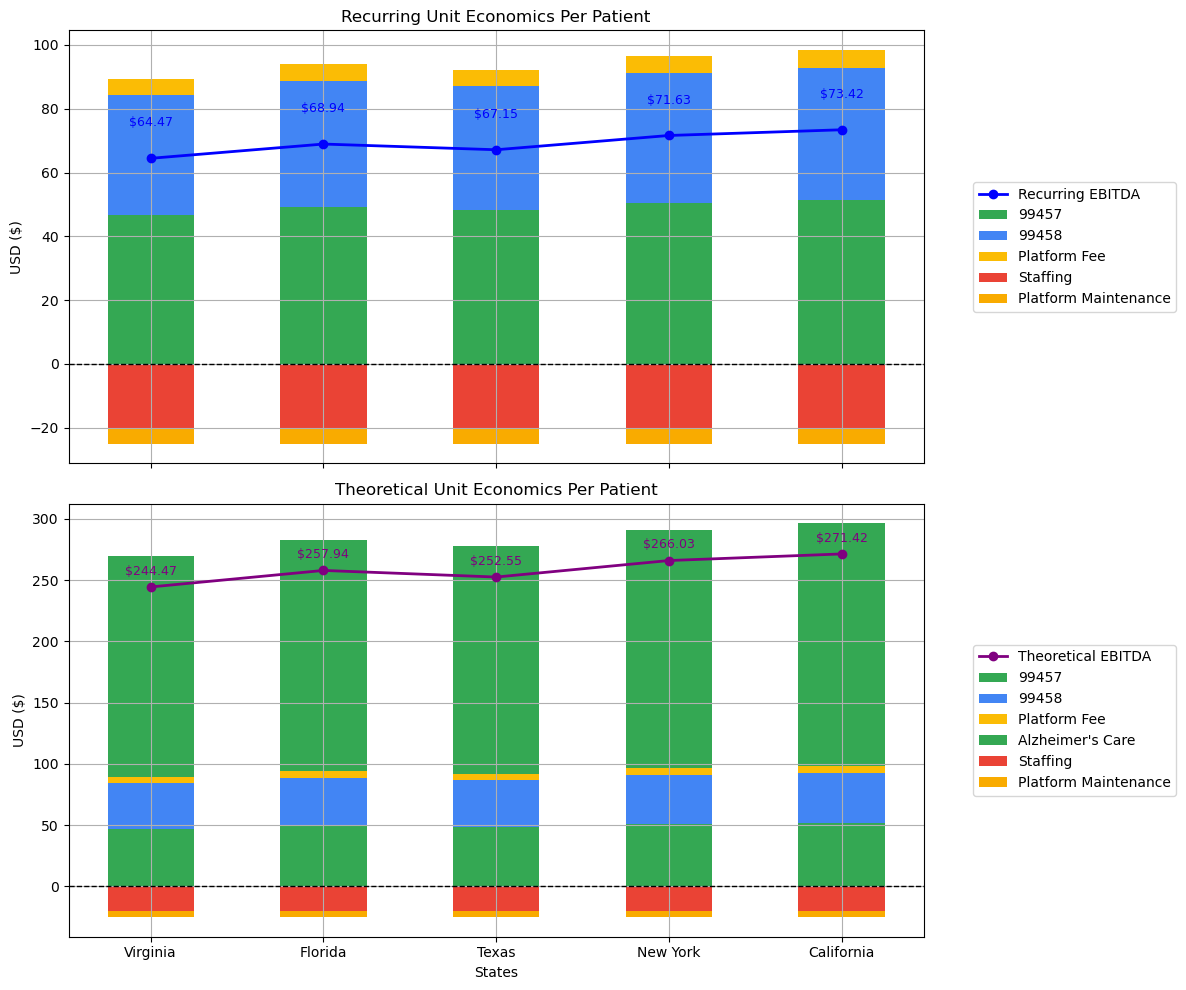

ModuleNotFoundError: No module named 'ace_tools'

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data for states
states = ["Virginia", "Florida", "Texas", "New York", "California"]
gpci_adjustments = {"Virginia": 1.0, "Florida": 1.05, "Texas": 1.03, "New York": 1.08, "California": 1.1}

# Recurring revenue and costs per patient (sample data)
recurring_revenue_per_patient = {"99457": 46.85, "99458": 37.62, "Platform Fee": 5.0}
recurring_costs_per_patient = {"Staffing": 20.0, "Platform Maintenance": 5.0}

# Theoretical revenue per patient (adding additional billing codes)
theoretical_revenue_per_patient = {"99457": 46.85, "99458": 37.62, "Platform Fee": 5.0, "Alzheimer's Care": 180.0}

# Data for the unit economics graph
recurring_ebitda = []
theoretical_ebitda = []

for state in states:
    gpci = gpci_adjustments[state]
    recurring_revenue = sum([gpci * rate for rate in recurring_revenue_per_patient.values()])
    recurring_cost = sum(recurring_costs_per_patient.values())
    recurring_ebitda.append(recurring_revenue - recurring_cost)

    theoretical_revenue = sum([gpci * rate for rate in theoretical_revenue_per_patient.values()])
    theoretical_ebitda.append(theoretical_revenue - recurring_cost)

# Data for visualization
unit_economics_df = pd.DataFrame({
    "State": states,
    "Recurring Revenue": [sum(recurring_revenue_per_patient.values()) * gpci for gpci in gpci_adjustments.values()],
    "Recurring Costs": [sum(recurring_costs_per_patient.values())] * len(states),
    "Recurring EBITDA": recurring_ebitda,
    "Theoretical Revenue": [sum(theoretical_revenue_per_patient.values()) * gpci for gpci in gpci_adjustments.values()],
    "Theoretical EBITDA": theoretical_ebitda
})

# Colors for stacked bars and lines
colors = {
    "revenue": ["#34A853", "#4285F4", "#FBBC05"],
    "costs": ["#EA4335", "#F9AB00"],
    "ebitda": "#1A73E8",
    "line": "#5F6368"
}

# Visualization
x = np.arange(len(states))
width = 0.5

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Stacked Bars for Recurring Unit Economics
recurring_revenue_bars = np.array([gpci * np.array(list(recurring_revenue_per_patient.values())) for gpci in gpci_adjustments.values()])
recurring_cost_bars = np.array([list(recurring_costs_per_patient.values()) for _ in states])

# Recurring Revenue Segmentation
for i, key in enumerate(recurring_revenue_per_patient.keys()):
    ax[0].bar(
        x,
        recurring_revenue_bars[:, i],
        width,
        bottom=recurring_revenue_bars[:, :i].sum(axis=1),
        label=f"{key}",
        color=colors["revenue"][i % len(colors["revenue"])]
    )

# Recurring Cost Segmentation
for i, key in enumerate(recurring_costs_per_patient.keys()):
    ax[0].bar(
        x,
        -recurring_cost_bars[:, i],  # Negative for costs
        width,
        bottom=-recurring_cost_bars[:, :i].sum(axis=1),
        label=f"{key}",
        color=colors["costs"][i % len(colors["costs"])]
    )

# Recurring EBITDA Line
ax[0].plot(
    x,
    unit_economics_df["Recurring EBITDA"],
    label="Recurring EBITDA",
    color="blue",
    marker="o",
    linewidth=2
)
# Annotate EBITDA values
for i, val in enumerate(unit_economics_df["Recurring EBITDA"]):
    ax[0].text(
        x[i],
        val + 10,  # Position slightly above the line
        f"${val:,.2f}",  # Format the value with commas and two decimals
        color="blue",
        fontsize=9,
        ha="center")

# Stacked Bars for Theoretical Unit Economics
theoretical_revenue_bars = np.array([gpci * np.array(list(theoretical_revenue_per_patient.values())) for gpci in gpci_adjustments.values()])

for i, key in enumerate(theoretical_revenue_per_patient.keys()):
    ax[1].bar(
        x,
        theoretical_revenue_bars[:, i],
        width,
        bottom=theoretical_revenue_bars[:, :i].sum(axis=1),
        label=f"{key}",
        color=colors["revenue"][i % len(colors["revenue"])]
    )

for i, key in enumerate(recurring_costs_per_patient.keys()):
    ax[1].bar(
        x,
        -recurring_cost_bars[:, i],
        width,
        bottom=-recurring_cost_bars[:, :i].sum(axis=1),
        label=f"{key}",
        color=colors["costs"][i % len(colors["costs"])]
    )

# Theoretical EBITDA Line
ax[1].plot(
    x,
    unit_economics_df["Theoretical EBITDA"],
    label="Theoretical EBITDA",
    color="purple",
    marker="o",
    linewidth=2
)
# Annotate EBITDA values
for i, val in enumerate(unit_economics_df["Theoretical EBITDA"]):
    ax[1].text(
        x[i],
        val + 10,  # Position slightly above the line
        f"${val:,.2f}",  # Format the value with commas and two decimals
        color="purple",
        fontsize=9,
        ha="center")
    
# Formatting
for axis in ax:
    axis.axhline(0, color="black", linestyle="--", linewidth=1)
    axis.set_ylabel("USD ($)")
    axis.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), fontsize=10)
    axis.grid(True)

ax[0].set_title("Recurring Unit Economics Per Patient")
ax[1].set_title("Theoretical Unit Economics Per Patient")
ax[1].set_xticks(x)
ax[1].set_xticklabels(states)
ax[1].set_xlabel("States")

plt.tight_layout()
plt.savefig("unit_economics_stacked_bar.pdf")
plt.show()

# Displaying DataFrame
unit_economics_df_formatted = unit_economics_df.style.format("${:,.2f}")
import ace_tools as tools; tools.display_dataframe_to_user(name="Unit Economics Per State", dataframe=unit_economics_df)


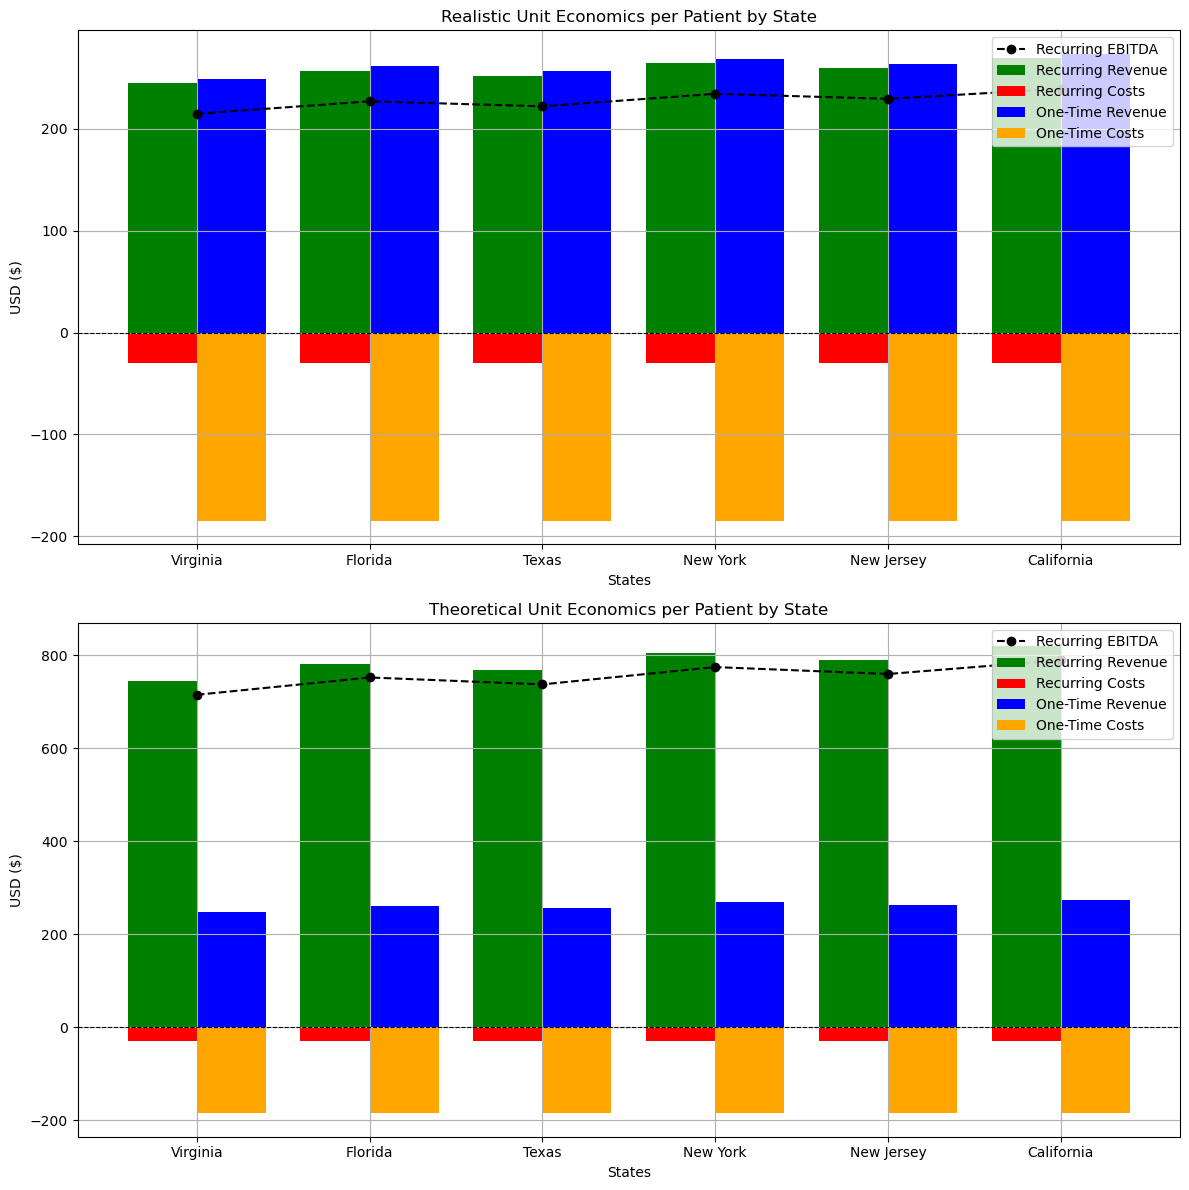

ModuleNotFoundError: No module named 'ace_tools'

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Billing codes with reimbursement rates (realistic)
billing_codes = {
    "99453": 18.95,  # RPM Setup (one-time)
    "99454": 45.12,  # RPM Device Supply (monthly)
    "99457": 46.85,  # RPM Management (first 20 mins, monthly)
    "99458": 37.62,  # Additional RPM Management (monthly)
    "99490": 59.90,  # CCM by Clinical Staff (monthly)
    "99491": 80.98,  # CCM by Physician (1 in 20 patients, monthly)
    "99091": 51.29,  # Data Interpretation (monthly)
    "99495": 230.00  # TCM (one-time)
}

# Theoretical billing codes (Year 3+)
theoretical_billing_codes = {
    **billing_codes,
    "Alzheimer’s Prevention": 180.00,  # Hypothetical billing code
    "Mental Health Support": 120.00,   # Hypothetical billing code
    "Preventive Care": 200.00          # Hypothetical billing code
}

# GPCI adjustments for states
gpci_adjustments = {
    "Virginia": 1.0,
    "Florida": 1.05,
    "Texas": 1.03,
    "New York": 1.08,
    "New Jersey": 1.06,
    "California": 1.1
}

# Recurring costs per patient
recurring_costs = {
    "Platform Fee": 5.00,  # In-house software maintenance
    "Staffing": 25.00  # Estimated clinician cost per patient
}

# One-time costs per patient
one_time_costs = {
    "Device": 185.00  # Hardware cost (one-time)
}

# Function to calculate unit economics
def calculate_unit_economics(state, billing_codes, recurring_costs, one_time_costs, patients, theoretical=False):
    gpci = gpci_adjustments[state]
    codes = theoretical_billing_codes if theoretical else billing_codes
    
    # Recurring Revenue
    recurring_revenue = (
        codes["99454"] +          # RPM Device Supply
        codes["99457"] +          # RPM ManagementÅÅ (first 20 mins)
        codes["99458"] +          # Additional RPM Management
        codes["99490"] +          # CCM by Clinical Staff
        (codes["99491"] / 20) +   # CCM by Physician (1 in 20 patients)
        codes["99091"]            # Data Interpretation
    )
    if theoretical:
        # Add theoretical billing codes to recurring revenue
        recurring_revenue += (
            codes["Alzheimer’s Prevention"] +
            codes["Mental Health Support"] +
            codes["Preventive Care"]
        )
    
    recurring_revenue *= gpci

    # One-Time Revenue
    one_time_revenue = (codes["99453"] + codes["99495"]) * gpci

    # Recurring Costs
    total_recurring_cost = recurring_costs["Platform Fee"] + recurring_costs["Staffing"]

    # One-Time Costs
    total_one_time_cost = one_time_costs["Device"]

    # EBITDA Calculations
    recurring_ebitda = recurring_revenue - total_recurring_cost
    one_time_ebitda = one_time_revenue - total_one_time_cost

    return {
        "State": state,
        "Recurring Revenue": recurring_revenue,
        "Recurring Costs": total_recurring_cost,
        "Recurring EBITDA": recurring_ebitda,
        "One-Time Revenue": one_time_revenue,
        "One-Time Costs": total_one_time_cost,
        "One-Time EBITDA": one_time_ebitda
    }

# Calculate unit economics for each state (realistic and theoretical)
patients = 150  # Example number of patients per nursing home
unit_economics_realistic = [calculate_unit_economics(state, billing_codes, recurring_costs, one_time_costs, patients) for state in gpci_adjustments.keys()]
unit_economics_theoretical = [calculate_unit_economics(state, billing_codes, recurring_costs, one_time_costs, patients, theoretical=True) for state in gpci_adjustments.keys()]

# Convert to DataFrame for display
unit_economics_realistic_df = pd.DataFrame(unit_economics_realistic)
unit_economics_theoretical_df = pd.DataFrame(unit_economics_theoretical)

# Visualization
states = unit_economics_realistic_df["State"]
x = np.arange(len(states))
width = 0.4

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Realistic Unit Economics
ax[0].bar(x - width / 2, unit_economics_realistic_df["Recurring Revenue"], width, label='Recurring Revenue', color='green')
ax[0].bar(x - width / 2, -unit_economics_realistic_df["Recurring Costs"], width, label='Recurring Costs', color='red')
ax[0].bar(x + width / 2, unit_economics_realistic_df["One-Time Revenue"], width, label='One-Time Revenue', color='blue')
ax[0].bar(x + width / 2, -unit_economics_realistic_df["One-Time Costs"], width, label='One-Time Costs', color='orange')
ax[0].plot(x, unit_economics_realistic_df["Recurring EBITDA"], label="Recurring EBITDA", color='black', marker='o', linestyle='--')
ax[0].set_title("Realistic Unit Economics per Patient by State")

# Theoretical Unit Economics
ax[1].bar(x - width / 2, unit_economics_theoretical_df["Recurring Revenue"], width, label='Recurring Revenue', color='green')
ax[1].bar(x - width / 2, -unit_economics_theoretical_df["Recurring Costs"], width, label='Recurring Costs', color='red')
ax[1].bar(x + width / 2, unit_economics_theoretical_df["One-Time Revenue"], width, label='One-Time Revenue', color='blue')
ax[1].bar(x + width / 2, -unit_economics_theoretical_df["One-Time Costs"], width, label='One-Time Costs', color='orange')
ax[1].plot(x, unit_economics_theoretical_df["Recurring EBITDA"], label="Recurring EBITDA", color='black', marker='o', linestyle='--')
ax[1].set_title("Theoretical Unit Economics per Patient by State")

# Formatting
for axis in ax:
    axis.axhline(0, color='black', linewidth=0.8, linestyle='--')
    axis.set_xticks(x)
    axis.set_xticklabels(states)
    axis.set_xlabel("States")
    axis.set_ylabel("USD ($)")
    axis.legend(loc="upper right")
    axis.grid(True)

plt.tight_layout()
plt.show()

# Display DataFrames for reference
import ace_tools as tools; tools.display_dataframe_to_user(name="Realistic Unit Economics Breakdown", dataframe=unit_economics_realistic_df)
tools.display_dataframe_to_user(name="Theoretical Unit Economics Breakdown", dataframe=unit_economics_theoretical_df)


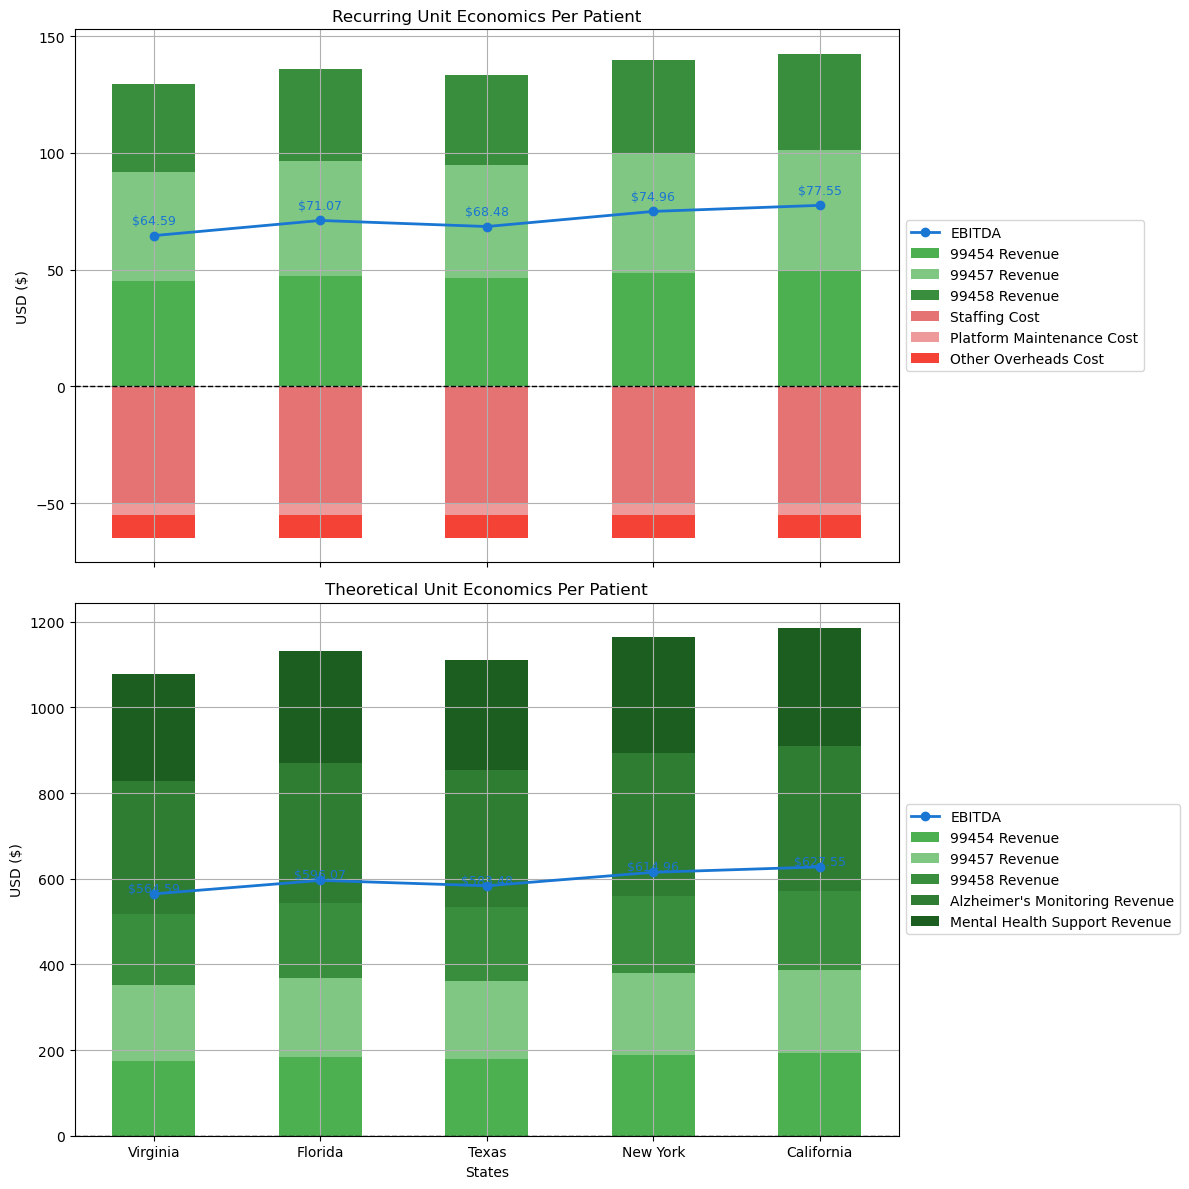

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the states
states = ["Virginia", "Florida", "Texas", "New York", "California"]

# Define GPCI adjustments
gpci_adjustments = {
    "Virginia": 1.0,
    "Florida": 1.05,
    "Texas": 1.03,
    "New York": 1.08,
    "California": 1.1
}

# Recurring billing codes revenue
recurring_revenue_per_patient = {
    "99454": 45.12,  # RPM Device Supply
    "99457": 46.85,  # RPM Management (1st 20 mins)
    "99458": 37.62   # Additional RPM Management
}

# Theoretical billing codes revenue
theoretical_revenue_per_patient = {
    **recurring_revenue_per_patient,  # Existing codes
    "Alzheimer's Monitoring": 180.00,
    "Mental Health Support": 120.00,
    "Preventive Care": 200.00
}

# Recurring costs per patient
recurring_costs_per_patient = {
    "Staffing": 50.00,  # Staff allocation per patient
    "Platform Maintenance": 5.00,  # Reduced cost for in-house platform
    "Other Overheads": 10.00
}

# Calculate recurring EBITDA
recurring_ebitda_per_patient = {
    state: sum(recurring_revenue_per_patient.values()) * gpci -
           sum(recurring_costs_per_patient.values())
    for state, gpci in gpci_adjustments.items()
}

# Calculate theoretical EBITDA
theoretical_ebitda_per_patient = {
    state: sum(theoretical_revenue_per_patient.values()) * gpci -
           sum(recurring_costs_per_patient.values())
    for state, gpci in gpci_adjustments.items()
}

# Prepare data for visualization
x = np.arange(len(states))
width = 0.5
colors = {
    "revenue": ["#4caf50", "#81c784", "#388e3c", "#2e7d32", "#1b5e20"],
    "costs": ["#e57373", "#ef9a9a", "#f44336", "#d32f2f", "#b71c1c"],
    "ebitda": "#1976d2"
}

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Stacked Bars for Recurring Unit Economics
for i, (key, color) in enumerate(zip(recurring_revenue_per_patient.keys(), colors["revenue"])):
    ax[0].bar(
        x,
        [gpci_adjustments[state] * recurring_revenue_per_patient[key] for state in states],
        width,
        bottom=np.sum(
            [[gpci_adjustments[state] * recurring_revenue_per_patient[prev_key] for state in states]
             for prev_key in list(recurring_revenue_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Revenue",
        color=color
    )

for i, (key, color) in enumerate(zip(recurring_costs_per_patient.keys(), colors["costs"])):
    ax[0].bar(
        x,
        [-recurring_costs_per_patient[key] for _ in states],
        width,
        bottom=-np.sum(
            [[recurring_costs_per_patient[prev_key] for _ in states]
             for prev_key in list(recurring_costs_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Cost",
        color=color
    )

# Plot Recurring EBITDA Line
ax[0].plot(
    x,
    list(recurring_ebitda_per_patient.values()),
    label="EBITDA",
    color=colors["ebitda"],
    marker="o",
    linewidth=2
)

# Annotations for EBITDA
for i, ebitda in enumerate(recurring_ebitda_per_patient.values()):
    ax[0].text(i, ebitda + 5, f"${ebitda:.2f}", color=colors["ebitda"], ha="center", fontsize=9)

# Theoretical Revenue Bar Chart: Combine Recurring and Theoretical
for i, (key, color) in enumerate(zip(theoretical_revenue_per_patient.keys(), colors["revenue"])):
    ax[1].bar(
        x,
        [
            gpci_adjustments[state] * (theoretical_revenue_per_patient[key] + sum(recurring_revenue_per_patient.values()))
            for state in states
        ],
        width,
        bottom=np.sum(
            [
                [
                    gpci_adjustments[state] * (theoretical_revenue_per_patient[prev_key] + sum(recurring_revenue_per_patient.values()))
                    for state in states
                ]
                for prev_key in list(theoretical_revenue_per_patient.keys())[:i]
            ],
            axis=0
        ),
        label=f"{key} Revenue",
        color=color
    )
# Plot Theoretical EBITDA Line
ax[1].plot(
    x,
    list(theoretical_ebitda_per_patient.values()),
    label="EBITDA",
    color=colors["ebitda"],
    marker="o",
    linewidth=2
)

# Annotations for Theoretical EBITDA
for i, ebitda in enumerate(theoretical_ebitda_per_patient.values()):
    ax[1].text(i, ebitda + 5, f"${ebitda:.2f}", color=colors["ebitda"], ha="center", fontsize=9)

# Formatting
for axis in ax:
    axis.axhline(0, color="black", linestyle="--", linewidth=1)
    axis.set_ylabel("USD ($)")
    axis.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    axis.grid(True)

ax[0].set_title("Recurring Unit Economics Per Patient")
ax[1].set_title("Theoretical Unit Economics Per Patient")
ax[1].set_xticks(x)
ax[1].set_xticklabels(states)
ax[1].set_xlabel("States")

plt.tight_layout()
plt.savefig("unit_economics_detailed.pdf")
plt.show()


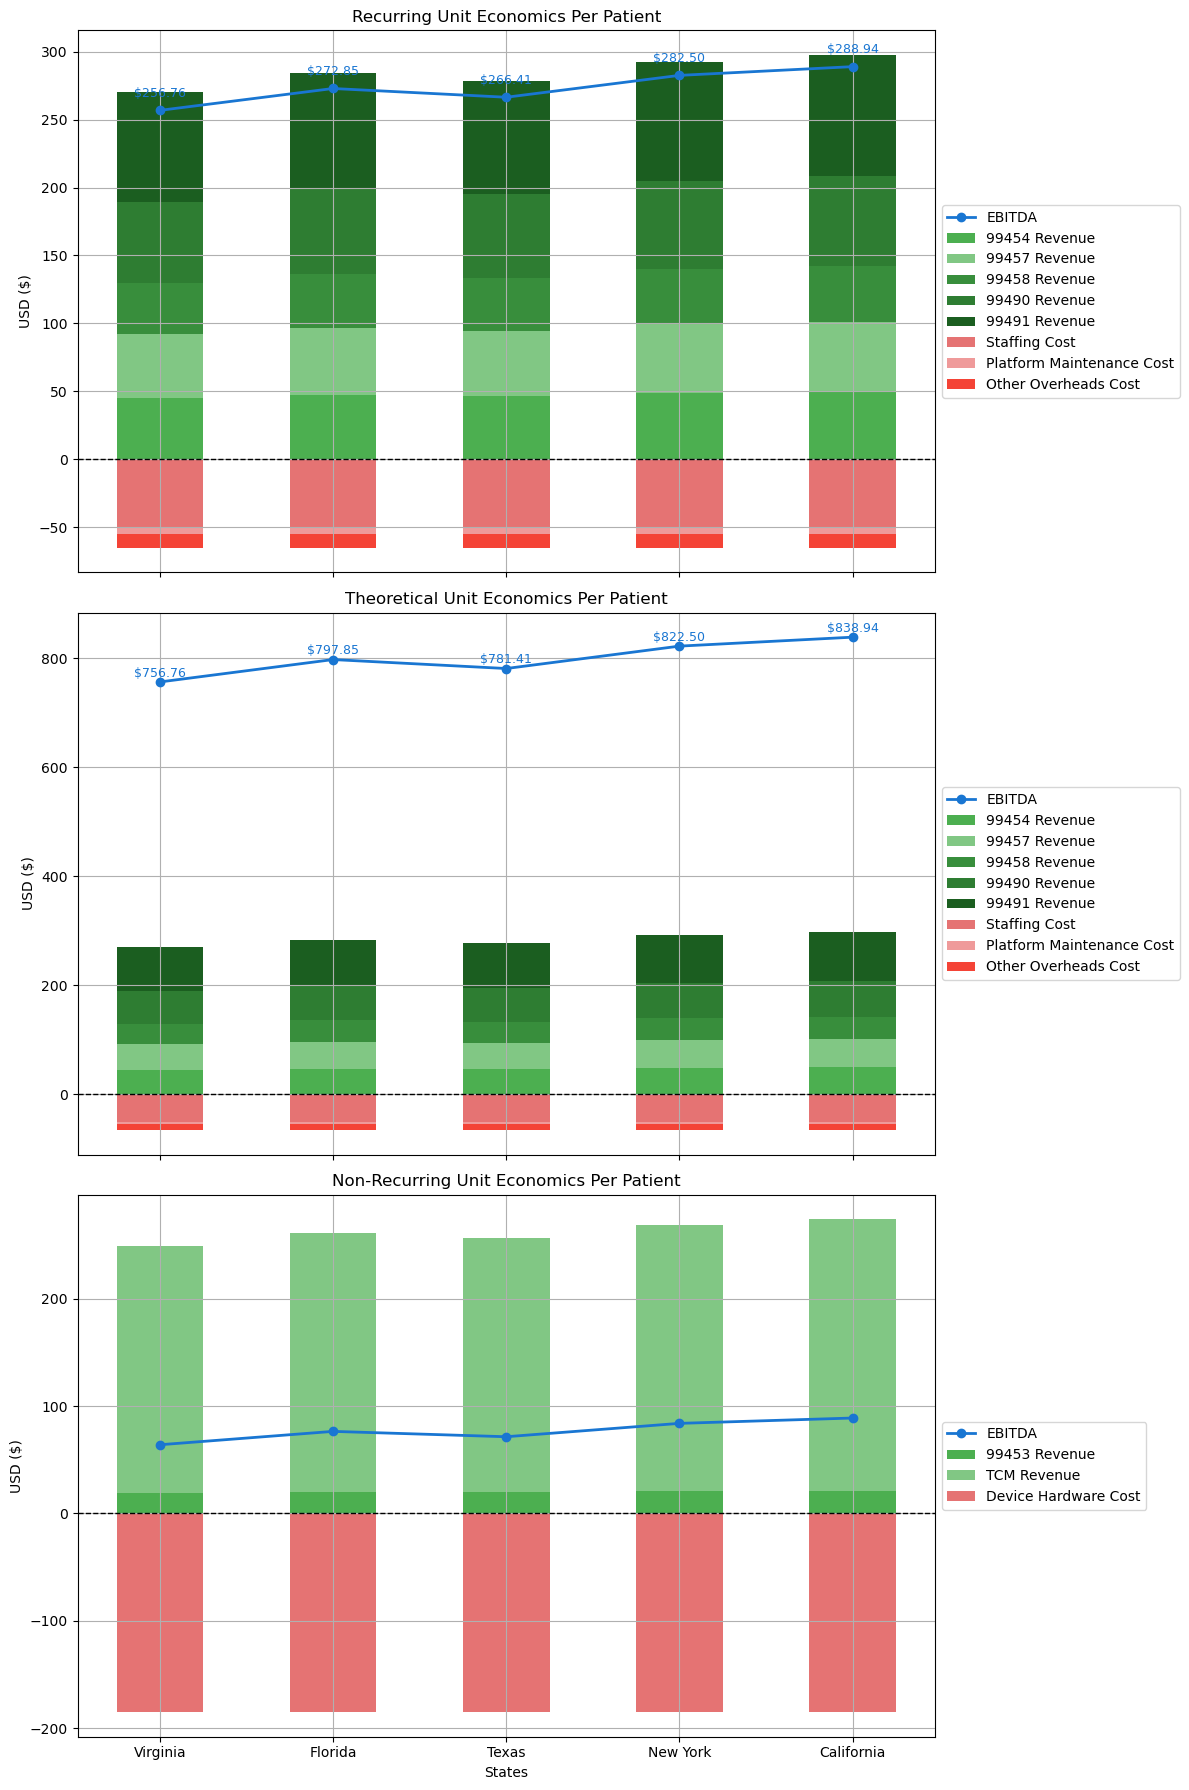

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the states
states = ["Virginia", "Florida", "Texas", "New York", "California"]

# Define GPCI adjustments
gpci_adjustments = {
    "Virginia": 1.0,
    "Florida": 1.05,
    "Texas": 1.03,
    "New York": 1.08,
    "California": 1.1
}

# Recurring billing codes revenue
recurring_revenue_per_patient = {
    "99454": 45.12,  # RPM Device Supply
    "99457": 46.85,  # RPM Management (1st 20 mins)
    "99458": 37.62,  # Additional RPM Management
    "99490": 59.90,  # CCM by Clinical Staff
    "99491": 80.98,  # CCM by Physician (1 in 20 patients, prorated),
    "99091": 51.29   # Data Interpretation
}

# Theoretical billing codes revenue
theoretical_revenue_per_patient = {
    **recurring_revenue_per_patient,
    "Alzheimer's Monitoring": 180.00,
    "Mental Health Support": 120.00,
    "Preventive Care": 200.00
}

# Recurring costs per patient
recurring_costs_per_patient = {
    "Staffing": 50.00,  # Staff allocation per patient
    "Platform Maintenance": 5.00,  # Reduced cost for in-house platform
    "Other Overheads": 10.00
}

# Non-recurring revenue and costs
non_recurring_revenue_per_patient = {
    "99453": 18.95,  # RPM Setup (one-time)
    "TCM": 230.00    # Transitional Care Management (one-time)
}
non_recurring_costs_per_patient = {
    "Device Hardware": 185.00  # One-time cost
}

# Calculate recurring EBITDA
recurring_ebitda_per_patient = {
    state: sum(recurring_revenue_per_patient.values()) * gpci -
           sum(recurring_costs_per_patient.values())
    for state, gpci in gpci_adjustments.items()
}

# Calculate theoretical EBITDA
theoretical_ebitda_per_patient = {
    state: sum(theoretical_revenue_per_patient.values()) * gpci -
           sum(recurring_costs_per_patient.values())
    for state, gpci in gpci_adjustments.items()
}

# Calculate non-recurring EBITDA
non_recurring_ebitda_per_patient = {
    state: sum(non_recurring_revenue_per_patient.values()) * gpci -
           sum(non_recurring_costs_per_patient.values())
    for state, gpci in gpci_adjustments.items()
}

# Prepare data for visualization
x = np.arange(len(states))
width = 0.5
colors = {
    "revenue": ["#4caf50", "#81c784", "#388e3c", "#2e7d32", "#1b5e20"],
    "costs": ["#e57373", "#ef9a9a", "#f44336", "#d32f2f", "#b71c1c"],
    "ebitda": "#1976d2"
}

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Recurring Unit Economics
for i, (key, color) in enumerate(zip(recurring_revenue_per_patient.keys(), colors["revenue"])):
    ax[0].bar(
        x,
        [gpci_adjustments[state] * recurring_revenue_per_patient[key] for state in states],
        width,
        bottom=np.sum(
            [[gpci_adjustments[state] * recurring_revenue_per_patient[prev_key] for state in states]
             for prev_key in list(recurring_revenue_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Revenue",
        color=color
    )

for i, (key, color) in enumerate(zip(recurring_costs_per_patient.keys(), colors["costs"])):
    ax[0].bar(
        x,
        [-recurring_costs_per_patient[key] for _ in states],
        width,
        bottom=-np.sum(
            [[recurring_costs_per_patient[prev_key] for _ in states]
             for prev_key in list(recurring_costs_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Cost",
        color=color
    )

ax[0].plot(
    x,
    list(recurring_ebitda_per_patient.values()),
    label="EBITDA",
    color=colors["ebitda"],
    marker="o",
    linewidth=2
)

# Annotations for recurring EBITDA
for i, ebitda in enumerate(recurring_ebitda_per_patient.values()):
    ax[0].text(i, ebitda + 10, f"${ebitda:.2f}", color=colors["ebitda"], ha="center", fontsize=9)

# Theoretical Unit Economics
for i, (key, color) in enumerate(zip(theoretical_revenue_per_patient.keys(), colors["revenue"])):
    ax[1].bar(
        x,
        [gpci_adjustments[state] * theoretical_revenue_per_patient[key] for state in states],
        width,
        bottom=np.sum(
            [[gpci_adjustments[state] * theoretical_revenue_per_patient[prev_key] for state in states]
             for prev_key in list(theoretical_revenue_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Revenue",
        color=color
    )

for i, (key, color) in enumerate(zip(recurring_costs_per_patient.keys(), colors["costs"])):
    ax[1].bar(
        x,
        [-recurring_costs_per_patient[key] for _ in states],
        width,
        bottom=-np.sum(
            [[recurring_costs_per_patient[prev_key] for _ in states]
             for prev_key in list(recurring_costs_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Cost",
        color=color
    )

ax[1].plot(
    x,
    list(theoretical_ebitda_per_patient.values()),
    label="EBITDA",
    color=colors["ebitda"],
    marker="o",
    linewidth=2
)

# Annotations for theoretical EBITDA
for i, ebitda in enumerate(theoretical_ebitda_per_patient.values()):
    ax[1].text(i, ebitda + 10, f"${ebitda:.2f}", color=colors["ebitda"], ha="center", fontsize=9)

# Non-recurring Unit Economics
for i, (key, color) in enumerate(zip(non_recurring_revenue_per_patient.keys(), colors["revenue"])):
    ax[2].bar(
        x,
        [gpci_adjustments[state] * non_recurring_revenue_per_patient[key] for state in states],
        width,
        bottom=np.sum(
            [[gpci_adjustments[state] * non_recurring_revenue_per_patient[prev_key] for state in states]
             for prev_key in list(non_recurring_revenue_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Revenue",
        color=color
    )

for i, (key, color) in enumerate(zip(non_recurring_costs_per_patient.keys(), colors["costs"])):
    ax[2].bar(
        x,
        [-non_recurring_costs_per_patient[key] for _ in states],
        width,
        bottom=-np.sum(
            [[non_recurring_costs_per_patient[prev_key] for _ in states]
             for prev_key in list(non_recurring_costs_per_patient.keys())[:i]],
            axis=0
        ),
        label=f"{key} Cost",
        color=color
    )

ax[2].plot(
    x,
    list(non_recurring_ebitda_per_patient.values()),
    label="EBITDA",
    color=colors["ebitda"],
    marker="o",
    linewidth=2
)

# Formatting
for axis in ax:
    axis.axhline(0, color="black", linestyle="--", linewidth=1)
    axis.set_ylabel("USD ($)")
    axis.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    axis.grid(True)

ax[0].set_title("Recurring Unit Economics Per Patient")
ax[1].set_title("Theoretical Unit Economics Per Patient")
ax[2].set_title("Non-Recurring Unit Economics Per Patient")
ax[2].set_xticks(x)
ax[2].set_xticklabels(states)
ax[2].set_xlabel("States")

plt.tight_layout()
plt.savefig("unit_economics_all_charts.pdf")
plt.show()
